# Seaborn 기초 실습

기본적인 분류 5가지의 기본적인 종류의 통계 시각화와 형태를 살펴봅시다.

- Categorical API
- Distribution API
- Relational API
- Regression API
- Matrix API


## 1. Seaborn의 구조 살펴보기

### 1-1. 라이브러리와 데이터셋 호출

In [1]:
# !pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print('seaborn version : ', sns.__version__)

seaborn version :  0.11.0


In [3]:
student = pd.read_csv('./StudentsPerformance.csv')
student.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
988,female,group A,some high school,free/reduced,none,44,45,45
127,male,group D,some college,standard,completed,65,77,74
281,male,group D,high school,standard,none,45,48,46
790,female,group B,high school,standard,none,48,62,60
372,male,group D,some high school,standard,none,74,74,72


### 1-2. Countplot으로 살펴보는 공통 파라미터

`countplot`은 seaborn의 Categorical API에서 대표적인 시각화로 범주를 이산적으로 세서 막대 그래프로 그려주는 함수입니다.

기본적으로 다음과 같은 파라미터가 있습니다. 설명에서 말하는 df는 pandas의 DataFrame을 의미합니다.

- `x` 
- `y`
- `data`
- `hue`
    - `hue_order`
- `palette`
- `color`
- `saturate`
- `ax`

이 중 `x`, `y`, `hue` 등은 기본적으로 `df`의 feature를 의미합니다. `dict`라면 key를 의미합니다.

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

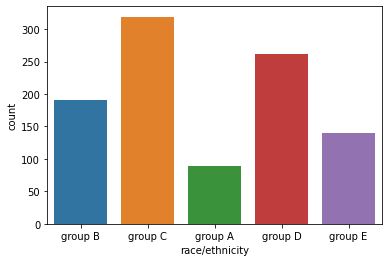

In [4]:
# parameter들이 어떻게 구성되어이 있는지 확인
# countplot은 범주를 이산적으로 count해서 bar chart로 보여줌
sns.countplot(x='race/ethnicity', data=student)

방향을 바꾸는 방법은 파라미터로 전달되는 x와 y값을 바꾸면 됩니다.

<AxesSubplot:xlabel='count', ylabel='race/ethnicity'>

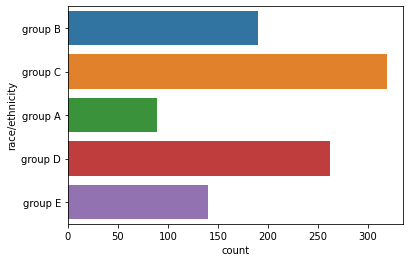

In [5]:
sns.countplot(y='race/ethnicity',data=student)

하지만 x, y가 변경되었을 때, 두 축 모두 자료형이 같다면 방향 설정이 원하는 방식대로 진행이 되지 않을 수 있습니다.
이럴 때는 `oriented`를 `v` 또는 `h`로 전달하여 원하는 시각화를 진행할 수 있습니다. 이는 추후 다른 차트에서 살펴보도록 하겠습니다.

그리고 현재 데이터의 순서가 지정되지 않았습니다. 이는 `order`로 순서를 명시할 수 있습니다.

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

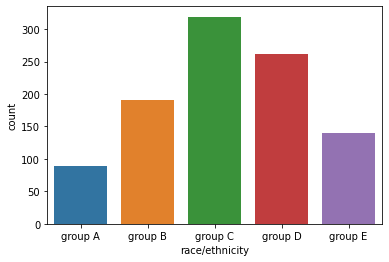

In [6]:
sns.countplot(x='race/ethnicity',data=student,
             # race/ethnicity의 feature들을 sorted
             order=sorted(student['race/ethnicity'].unique())
             
             )

hue는 색을 의미하는데, 데이터의 구분 기준을 정하여 색상을 통해 내용을 구분합니다.

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

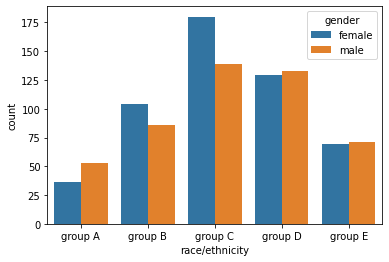

In [7]:
sns.countplot(x='race/ethnicity',data=student,
              # gender기준으로 색상 구분
              hue='gender', 
              order=sorted(student['race/ethnicity'].unique())
             )

색은 palette를 변경하여 바꿀 수 있습니다.

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

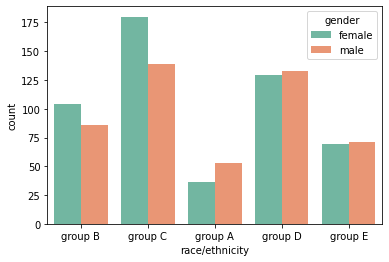

In [8]:
sns.countplot(x='race/ethnicity',data=student,
              hue='gender', palette='Set2'
             )

hue로 지정된 그룹을 Gradient 색상을 전달할 수 있습니다.

<AxesSubplot:xlabel='gender', ylabel='count'>

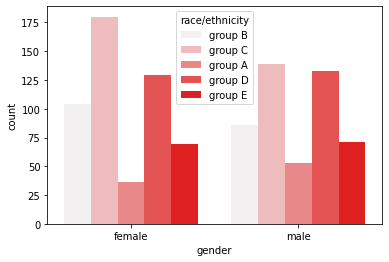

In [9]:
sns.countplot(x='gender',data=student,
              hue='race/ethnicity', color='red'
             )


색으로 구분하게 될 때, 순서가 애매해질 수 있습니다. 이럴 때는 `hue_order`의 순서를 정해줄 수 있습니다.

<AxesSubplot:xlabel='gender', ylabel='count'>

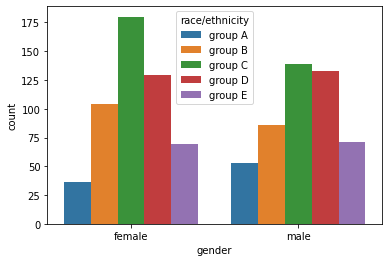

In [10]:
sns.countplot(x='gender',data=student,
              hue='race/ethnicity', 
              # 하지만 이산데이터 이므로 사용은 하지않음
              hue_order=sorted(student['race/ethnicity'].unique()) , # color='red'
             )

`saturation` (채도) 도 조정할 수 있지만 크게 추천하지는 않습니다.

<AxesSubplot:xlabel='gender', ylabel='count'>

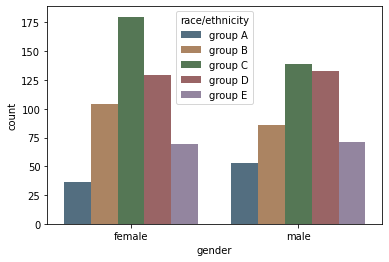

In [11]:
sns.countplot(x='gender',data=student,
              hue='race/ethnicity', 
              hue_order=sorted(student['race/ethnicity'].unique()),
              saturation=0.3
             )

그리고 matplotlib과 함께 사용하기 적합하게 `ax` 를 지정하여 seaborn plot을 그릴 수 있습니다.

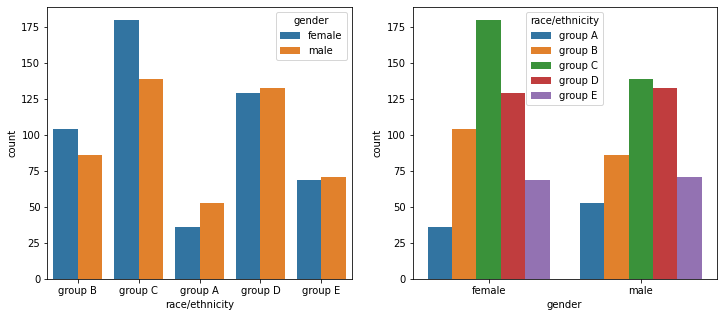

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='race/ethnicity',data=student,
              hue='gender', 
              ax=axes[0]
             )

sns.countplot(x='gender',data=student,
              hue='race/ethnicity', 
              hue_order=sorted(student['race/ethnicity'].unique()), 
              ax=axes[1]
             )


plt.show()

이제 구체적으로 살펴봅시다.

## 2. Categorical API

데이터의 통계량을 기본적으로 살펴보겠습니다.

- `count`
    - missing value
    
데이터가 정규분포에 가깝다면 평균과 표준 편차를 살피는 게 의미가 될 수 있습니다.

- `mean` (평균)
- `std` (표준 편차)

하지만 데이터가 정규분포에 가깝지 않다면 다른 방식으로 대표값을 뽑는 게 더 좋을 수 있습니다.

> 예시로 직원 월급 평균에서 임원급 월급은 빼야하듯?

분위수란 자료의 크기 순서에 따른 위치값으로 백분위값으로 표기하는 게 일반적입니다.

- 사분위수 : 데이터를 4등분한 관측값
    - `min`
    - `25%` (lower quartile)
    - `50%` (median)
    - `75%` (upper quartile)
    - `max`



In [13]:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 2-1. Box Plot

설명할게 많아 링크 읽어보기
- [Understanding Boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

분포를 살피는 대표적인 시각화 방법으로 Box plot이 있습니다.(max값 기준으로 시각화)

중간의 사각형은 25%, medium, 50% 값을 의미합니다.(각 선과 점의 의미를 아는게 중요)

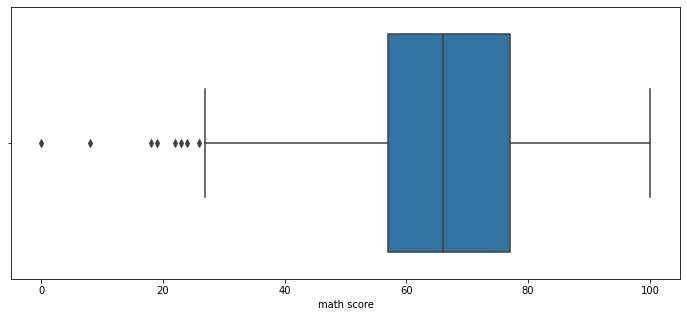

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
sns.boxplot(x='math score', data=student, ax=ax)
plt.show()

# 파란 중앙선이 중앙값
# 왼쪽이 25%
# 오른쪽이 75%의미

추가적으로 Boxplot을 이해하기 위해서는 IQR을 알아야 합니다.

- **interquartile range (IQR)**: 25th to the 75th percentile.(25%~75%까지의 거리)

그리고 Boxplot에서 outlier은 다음과 같이 표현하고 있습니다.(IQR에서 벗어나면 다르게)

- **whisker** : 박스 외부의 범위를 나타내는 선
- **outlier** : -IQR*1.5과 +IQR*1.5을 벗어나는 값

그래서 왼쪽과 오른쪽 막대는 +-IQR * 1.5 범위를 점들이 Outlier를 의미합니다.
하지만 whisker의 길이는 같지 않습니다. 이는 실제 데이터의 위치를 반영하여 

- min : -IQR * 1.5 보다 크거나 같은 값들 중 최솟값
- max : +IQR * 1.5 보다 작거나 같은 값들 중 최댓값

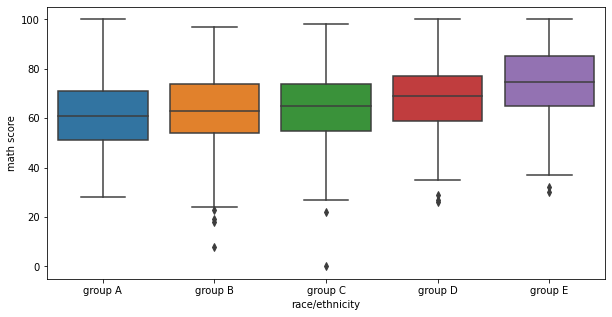

In [60]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

# 5가지 범주(group A~E)까지 분포 확인
sns.boxplot(x='race/ethnicity', y='math score', data=student, 
            order=sorted(student['race/ethnicity'].unique()),
            ax=ax)
plt.show()

마찬가지로 분포를 다음과 같이 특정 key에 따라 살펴볼 수도 있습니다.

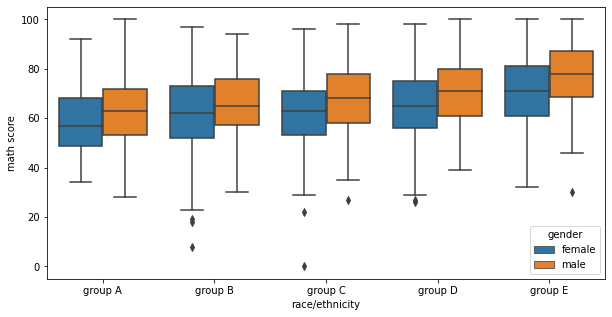

In [62]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

# 특정 key gender로 나눠보기
sns.boxplot(x='race/ethnicity', y='math score', data=student,
            hue='gender',
            order=sorted(student['race/ethnicity'].unique()),
            ax=ax)

plt.show()

다음 요소를 사용하여 시각화를 커스텀할 수 있습니다.

- `width`
- `linewidth`
- `fliersize`

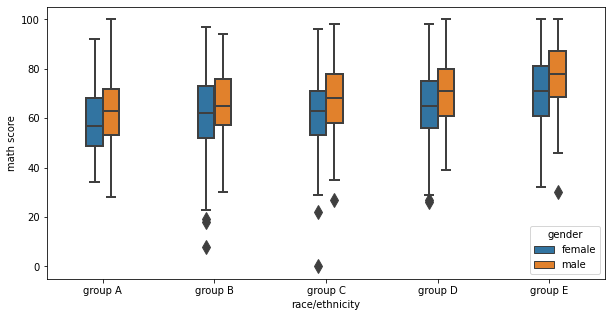

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

sns.boxplot(x='race/ethnicity', y='math score', data=student,
            hue='gender', 
            order=sorted(student['race/ethnicity'].unique()),
            width=0.3, 
            linewidth=2,
            fliersize=10,
            ax=ax)

plt.show()

### 2-2. Violin Plot

box plot은 대푯값을 잘 보여주지만 실제 분포를 표현하기에는 부족합니다. 

이런 분포에 대한 정보를 더 제공해주기에 적합한 방식 중 하나가 Violinplot입니다.

이번에는 흰점이 50%를 중간 검정 막대가 IQR 범위를 의미합니다.

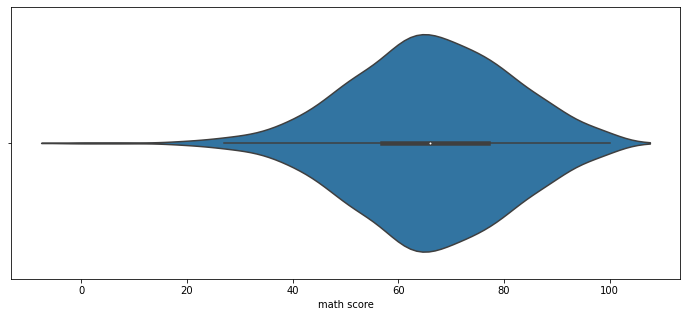

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
sns.violinplot(x='math score', data=student, ax=ax)
plt.show()

# 흰점이 중앙값
# 두꺼운 선이 25%~75%

violin plot은 **오해가 생기기 충분한 분포 표현 방식**입니다.

- 데이터는 연속적이지 않습니다. (kernel density estimate를 사용합니다.)
- 또한 연속적 표현에서 생기는 데이터의 손실과 오차가 존재합니다.
- 데이터의 범위가 없는 데이터까지 표시됩니다.

이런 오해를 줄이고 정보량을 높이는 방법은 다음과 같은 방법이 있습니다.

- `bw` : 분포 표현을 얼마나 자세하게 보여줄 것인가
    - ‘scott’, ‘silverman’, float
- `cut` : 끝부분을 얼마나 자를 것인가?
    - float
- `inner` : 내부를 어떻게 표현할 것인가 
    - “box”, “quartile”, “point”, “stick”, None

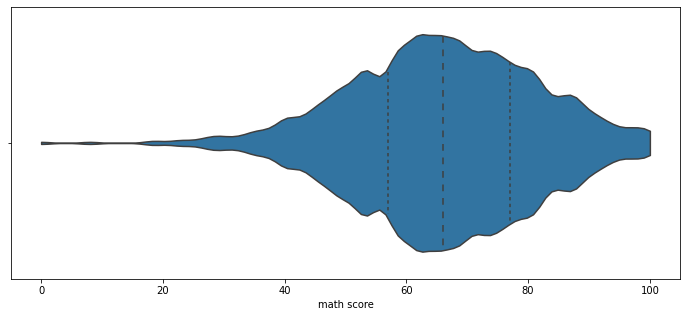

In [69]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
sns.violinplot(x='math score', data=student, ax=ax,
               
               # 분포를 자세하게
               bw=0.1,
               # 끝을 얼마나 잘라줄지
               cut=0,
               inner='quartile' # stick 
              )
plt.show()

이제 hue를 사용하여 다양한 분포를 살펴보겠습니다.

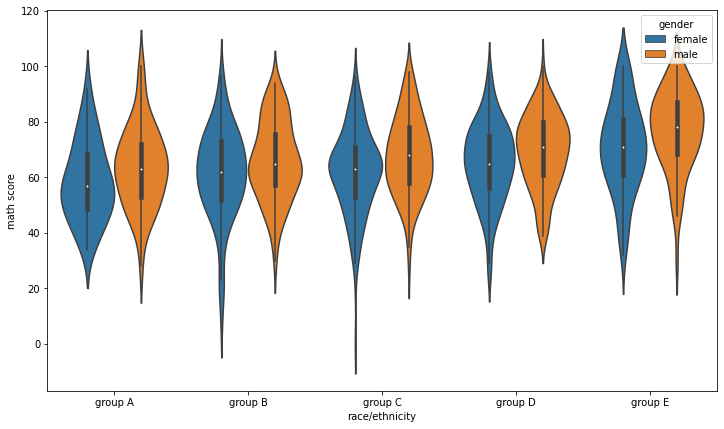

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
sns.violinplot(x='race/ethnicity', y='math score', data=student, ax=ax,
               hue='gender', order=sorted(student['race/ethnicity'].unique())
              )
plt.show()

여기서도 적합한 비교를 위해 다양한 변수를 조정할 수 있습니다.

- `scale` : 각 바이올린의 종류
    - “area”, “count”, “width”


두개를 비교할 때 split이 좋음
- `split` : 동시에 비교

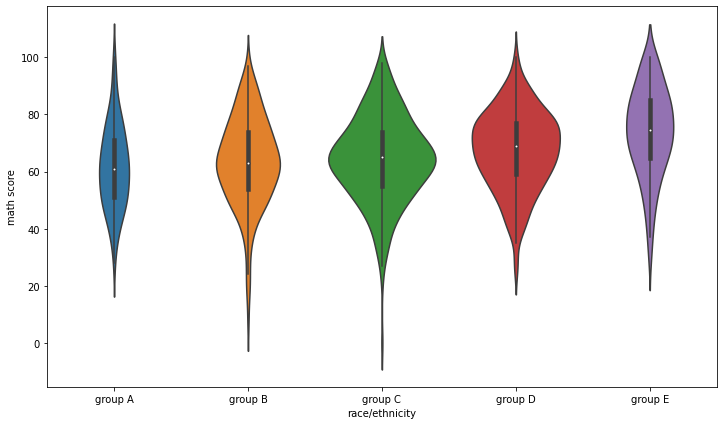

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
sns.violinplot(x='race/ethnicity', y='math score', data=student, ax=ax,
               order=sorted(student['race/ethnicity'].unique()),
               scale='count' # width는 너비가 같게 비교
              )
plt.show()

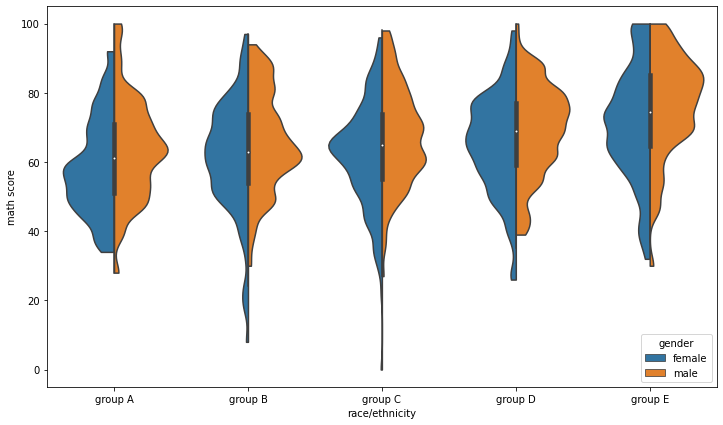

In [73]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
sns.violinplot(x='race/ethnicity', y='math score', data=student, ax=ax,
               order=sorted(student['race/ethnicity'].unique()),
               hue='gender',
               split=True,
               bw=0.2, cut=0
              )
plt.show()

## 2-3. ETC

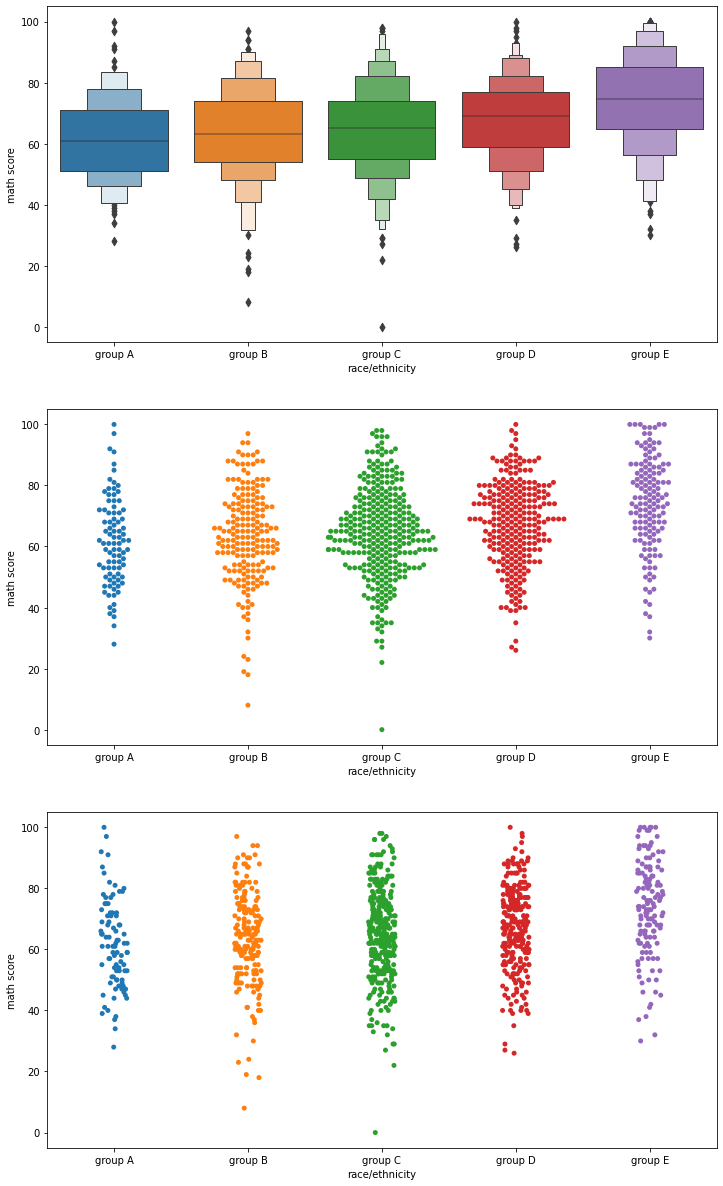

In [23]:
fig, axes = plt.subplots(3,1, figsize=(12, 21))
sns.boxenplot(x='race/ethnicity', y='math score', data=student, ax=axes[0],
               order=sorted(student['race/ethnicity'].unique()))

sns.swarmplot(x='race/ethnicity', y='math score', data=student, ax=axes[1],
               order=sorted(student['race/ethnicity'].unique()))

sns.stripplot(x='race/ethnicity', y='math score', data=student, ax=axes[2],
               order=sorted(student['race/ethnicity'].unique()))
plt.show()

# 차례 대로 
# boxenplot : box violet 합쳐서 단점 보완 but 그냥 box violet합쳐서 사용하지 많이 사용 x
# swarmplot : violet 과 함꼐 사용하면 좋다
# stripplot : 직선 막대에 점을 뿌려놓음, 밀도를 보기 좋다

## 3. Distribution 

범주형/연속형을 모두 살펴볼 수 있는 분포 시각화를 살펴봅시다.

### 3-1. Univariate Distribution 

- `histplot` : 히스토그램
- `kdeplot` : Kernel Density Estimate
- `ecdfplot` : 누적 밀도 함수
- `rugplot` : 선을 사용한 밀도함수

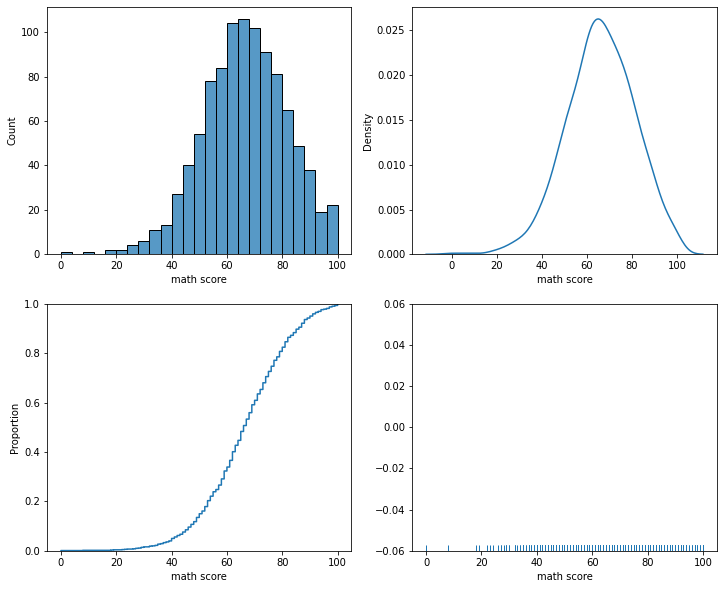

In [24]:
fig, axes = plt.subplots(2,2, figsize=(12, 10))
axes = axes.flatten()

sns.histplot(x='math score', data=student, ax=axes[0])

sns.kdeplot(x='math score', data=student, ax=axes[1])

sns.ecdfplot(x='math score', data=student, ax=axes[2])

sns.rugplot(x='math score', data=student, ax=axes[3])


plt.show()

### histplot
`histplot`부터 살펴보겠습니다. 

근사를 하고 막대를 사용해 분포를 확인  
막대 개수나 간격에 대한 조정은 대표적으로 2가지 파라미터가 있습니다.

- `binwidth`
- `bins`

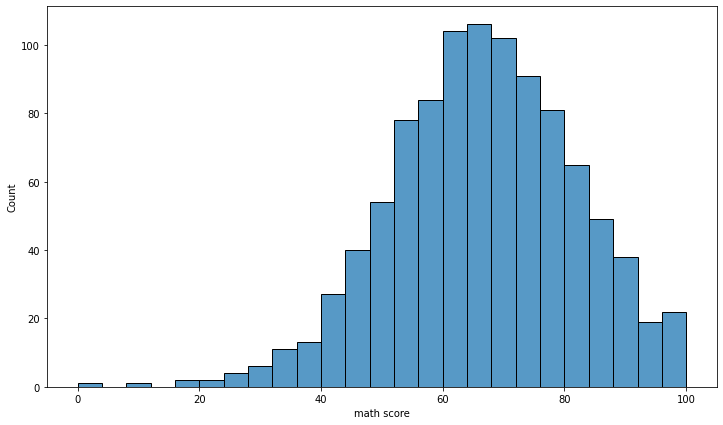

In [25]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.histplot(x='math score', data=student, ax=ax,
#              binwidth=50, # 너비를 조정 
#              bins=100, # 갯수를 조정
            )

plt.show()

히스토그램은 기본적으로 막대지만, seaborn에서는 다른 표현들도 제공하고 있습니다.

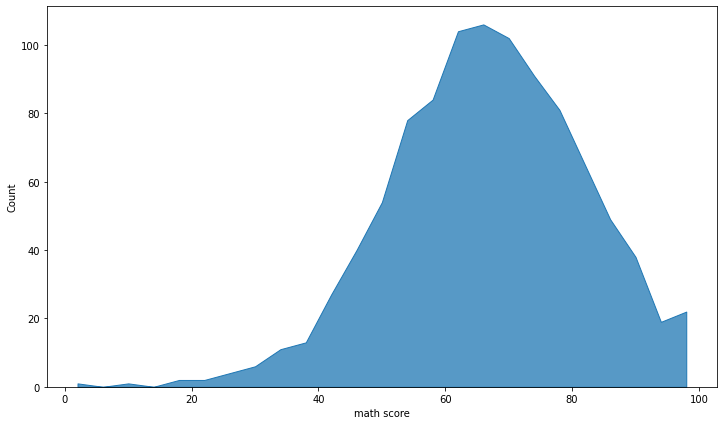

In [26]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.histplot(x='math score', data=student, ax=ax,
             element='poly' # step, poly 등을 사용해 표현 가능
            )

plt.show()

histogram은 다음과 같이 N개의 분포를 표현할 수 있습니다.

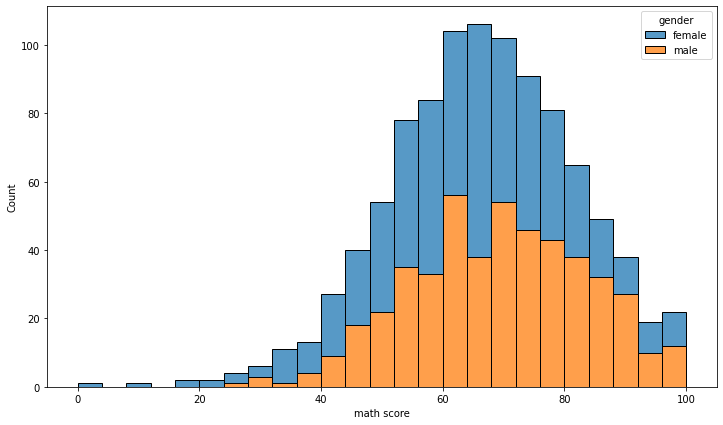

In [27]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.histplot(x='math score', data=student, ax=ax,
             hue='gender', 
             multiple='stack', # layer, dodge, stack, fill
            )

plt.show()

### kdeplot
이번엔 kdeplot을 살펴보겠습니다. kdeplot은 이미 violin에서 살펴보긴 했습니다.

연속확률밀도를 보여주는 함수로 seaborn의 다양한 smoothing 및 분포 시각화에 보조 정보로도 많이 사용합니다.

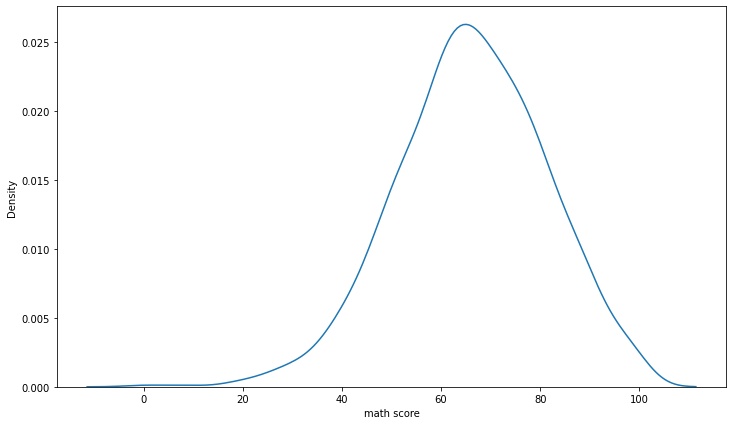

In [28]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='math score', data=student, ax=ax)
plt.show()

밀도 함수를 그릴 때는 단순히 선만 그려서는 정보의 전달이 어려울 수 있습니다.

`fill='True'`를 전달하여 내부를 채워 표현하는 것을 추천합니다.(밀도라는 것은 표현)

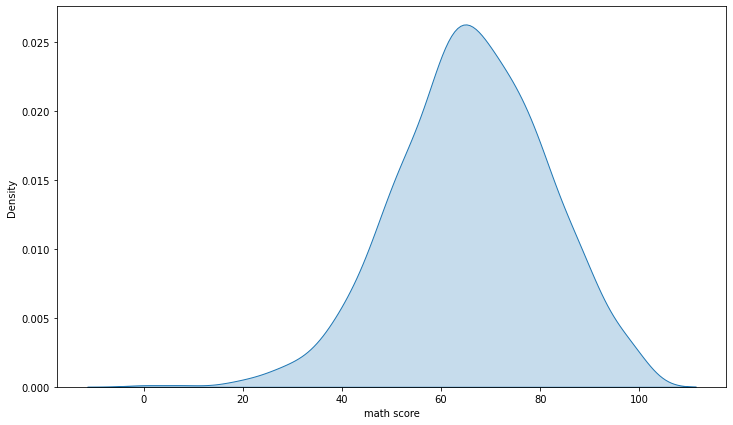

In [29]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='math score', data=student, ax=ax,
           fill=True)
plt.show()

`bw_method`를 사용하여 분포를 더 자세하게 표현할 수도 있습니다.

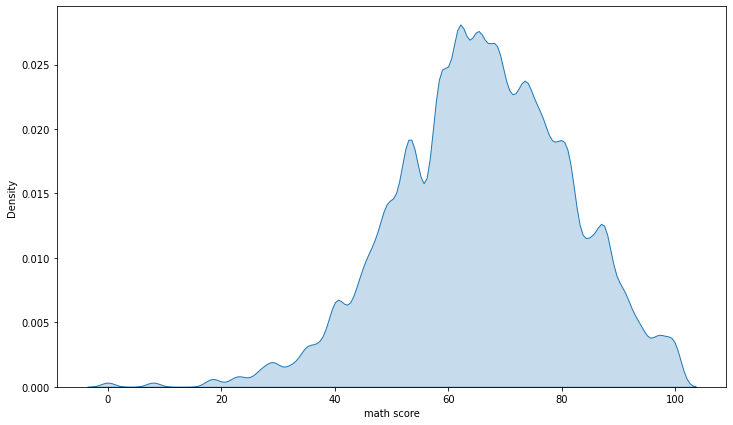

In [78]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='math score', data=student, ax=ax,
           fill=True, bw_method=0.08)
plt.show()

이번에도 다양한 분포를 살펴보겠습니다. histogram의 연속적 표현이라고 생각하면 편합니다.

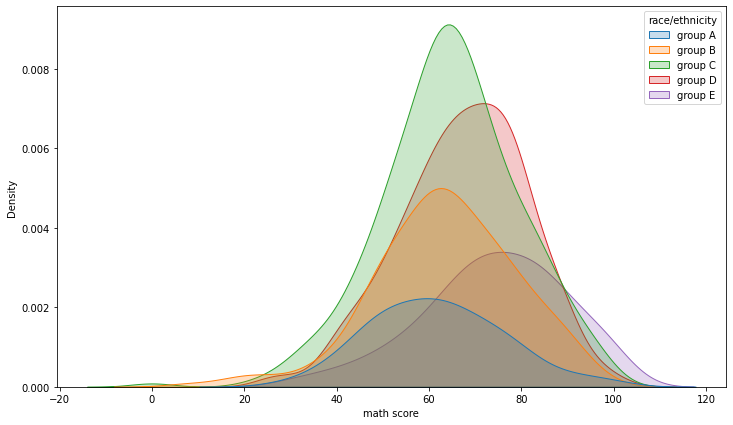

In [31]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='math score', data=student, ax=ax,
            fill=True, 
            hue='race/ethnicity', 
            hue_order=sorted(student['race/ethnicity'].unique()))
plt.show()

여러 분포를 표현하기 위해 다음과 같은 방법을 사용할 수 있습니다

- `stack`
- `layer`
- `fill`

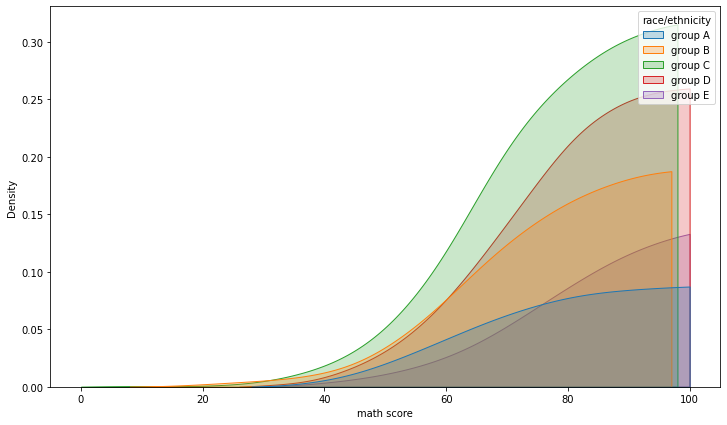

In [83]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='math score', data=student, ax=ax,
            fill=True, 
            hue='race/ethnicity', 
            hue_order=sorted(student['race/ethnicity'].unique()),
            multiple="layer", # layer, stack, fill(사용지양)
            cumulative=True, # 쌓는 parameter        
            cut=0
           )
plt.show()

ecdfplot은 누적되는 양을 표현합니다. 이미 위에서 cumulative로 살펴봤겠지만 가볍게 살펴봅시다. (많이사용되지 않음)

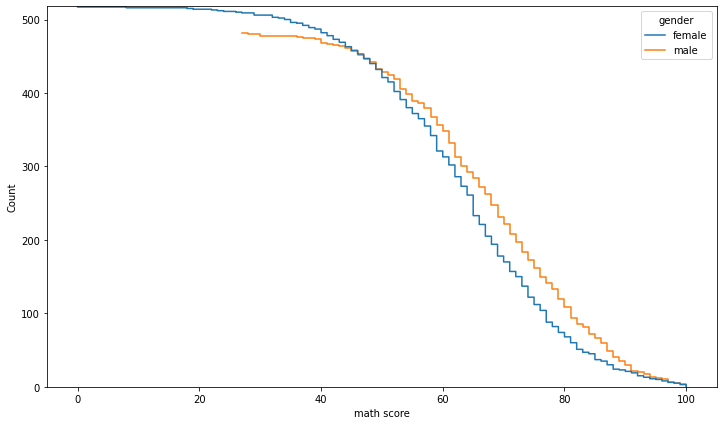

In [85]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.ecdfplot(x='math score', data=student, ax=ax,
             hue='gender',
             stat='count', # proportion
             complementary=True # 0에서 시작할지 1에서 시작할지(위,아래?)
            )
plt.show()

rugplot은 조밀한 정도를 통해 밀도를 나타냅니다.

개인적으로는 추천하지 않지만 한정된 공간 내에서 분포를 표현하기에 좋은 것 같습니다.

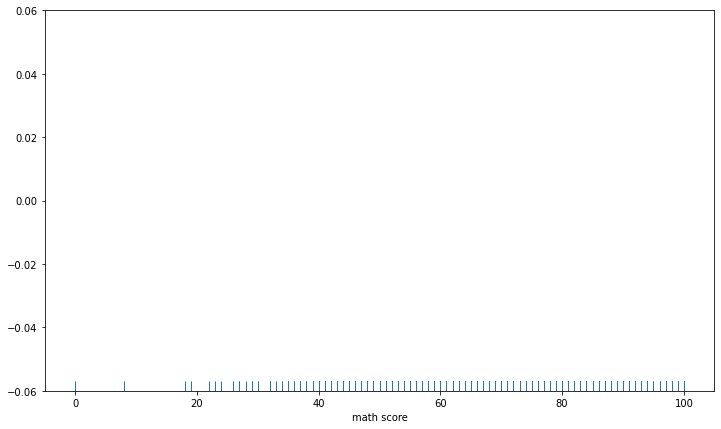

In [34]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.rugplot(x='math score', data=student, ax=ax)
plt.show()

### 3-2. Bivariate Distribution

이제는 2개 이상 변수를 동시에 분포를 살펴보도록 하겠습니다.

결합 확률 분포(joint probability distribution)를 살펴 볼 수 있습니다.

함수는 histplot과 kdeplot을 사용하고, 입력에 1개의 축만 넣는 게 아닌 2개의 축 모두 입력을 넣어주는 것이 특징입니다.

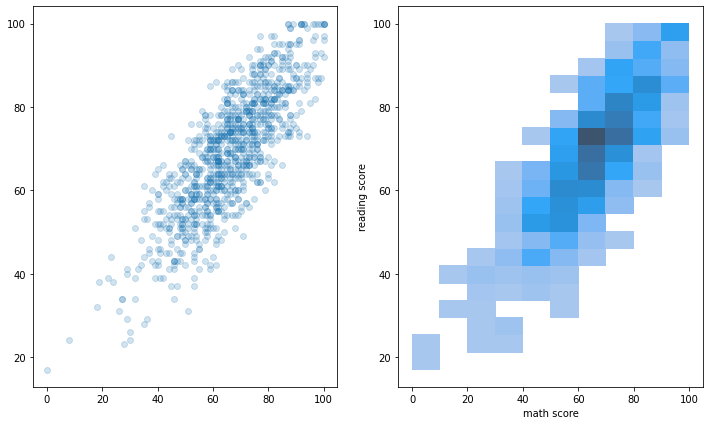

In [35]:
# histplot
fig, axes = plt.subplots(1,2, figsize=(12, 7))
ax.set_aspect(1)

# scatter를 사용하는거보다
axes[0].scatter(student['math score'], student['reading score'], alpha=0.2)

# 특정구간의 밀도를 나누는 것이 보기 편함
sns.histplot(x='math score', y='reading score', 
             data=student, ax=axes[1],
#              color='orange', 
             cbar=False, # color bar
             bins=(10, 20), # 구간 몇개로 나눌지
            )

plt.show()

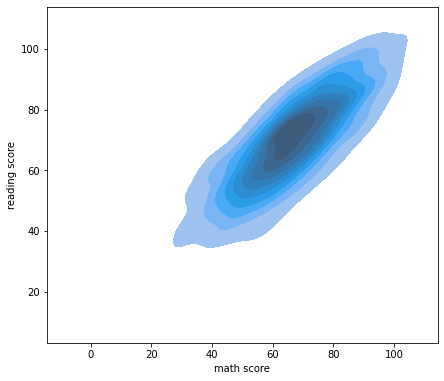

In [36]:
# kdeplot
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_aspect(1)

sns.kdeplot(x='math score', y='reading score', 
             data=student, ax=ax,
            fill=True,
#             bw_method=0.1 # 구간 얼마나 자세히 나눌지
            )

plt.show()

## 4. Relation & Regression


### 4-1. Scatter Plot

산점도는 다음과 같은 요소를 사용할 수 있습니다.

- `style` (marker)
- `hue` (색상)
- `size` (size)

앞서 차트의 요소에서 다루었기에 가볍게만 살펴보고 넘어가겠습니다.

`style, hue, size`에 대한 순서는 각각 `style_order, hue_order, size_order`로 전달할 수 있습니다.

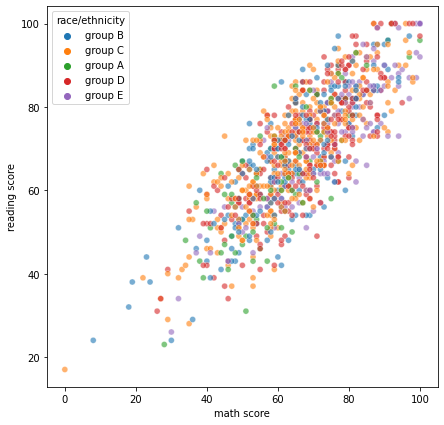

In [90]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x='math score', y='reading score', data=student,
#                style='gender', markers={'male':'s', 'female':'o'},
                hue='race/ethnicity', alpha = 0.6,
#                 size='writing score',
               )
plt.show()

### 4-2. Line Plot

선그래프도 이미 기본차트에서 살펴보았기에 가볍게만 살펴보고 가겠습니다.

시계열 데이터를 시각화해보겠습니다.

In [91]:
# seaborn에서 시계열 데이터 load
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [39]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<AxesSubplot:xlabel='year', ylabel='Jan'>

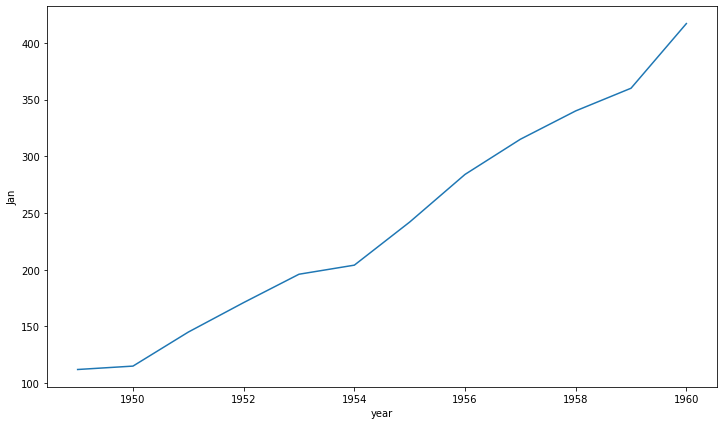

In [40]:
fig, ax = plt.subplots(1, 1,figsize=(12, 7))

# 연도별 1월 탑승자
sns.lineplot(x='year', y='Jan',data=flights_wide, ax=ax)

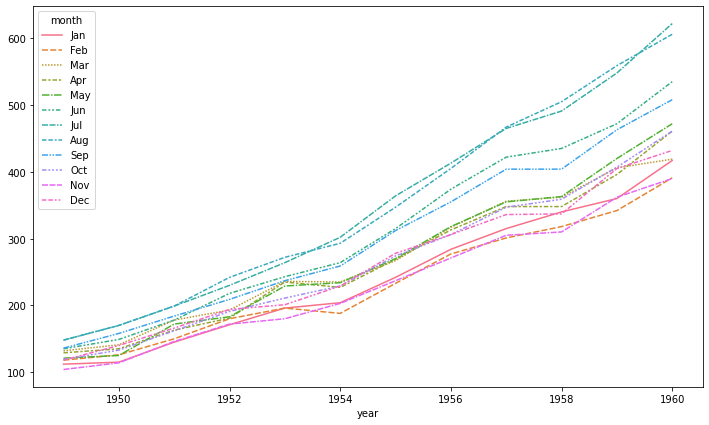

In [41]:
fig, ax = plt.subplots(1, 1,figsize=(12, 7))
sns.lineplot(data=flights_wide, ax=ax)
plt.show()

자동으로 평균과 표준편차로 오차범위를 시각화해줍니다.

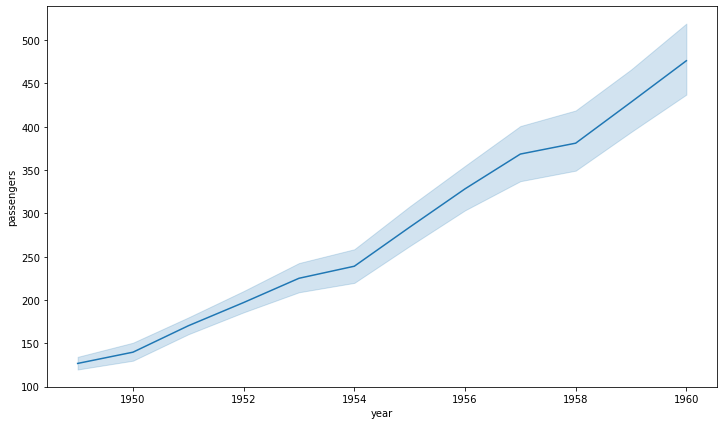

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.lineplot(data=flights, x="year", y="passengers", ax=ax)
plt.show()

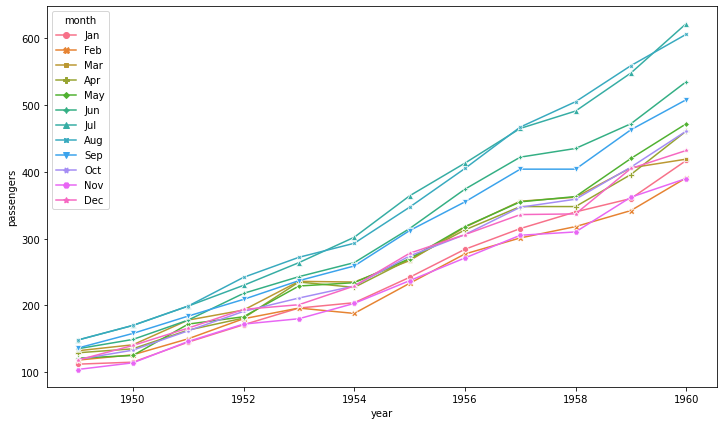

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.lineplot(data=flights, x="year", y="passengers", hue='month', 
             style='month', markers=True, dashes=False,
             ax=ax)
plt.show()



### 4-3. Regplot

선형성을 보여주기 좋다  
회귀선을 추가한 scatter plot입니다.

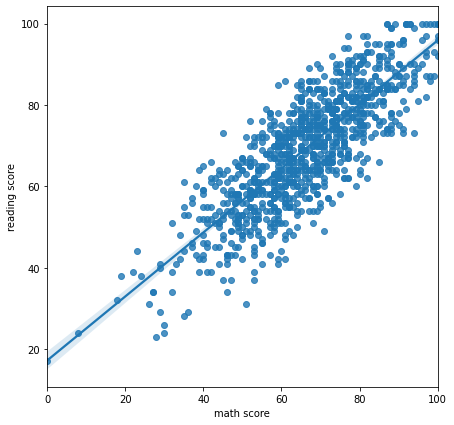

In [44]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.regplot(x='math score', y='reading score', data=student,
               )
plt.show()

한 축에 한 개의 값만 보여주기 위해서 다음과 같이 사용할 수 있습니다.

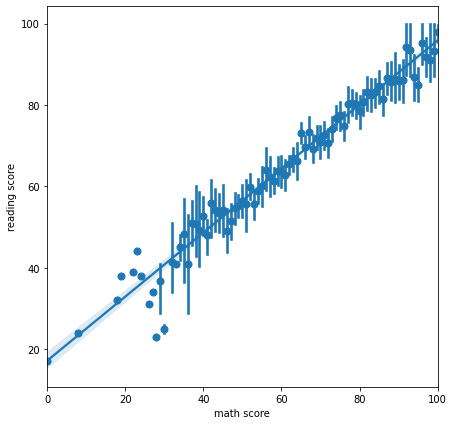

In [45]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.regplot(x='math score', y='reading score', data=student,

            # 추세선을 평균으로
            x_estimator=np.mean
           )
plt.show()

보여주는 개수도 지정할 수 있습니다.

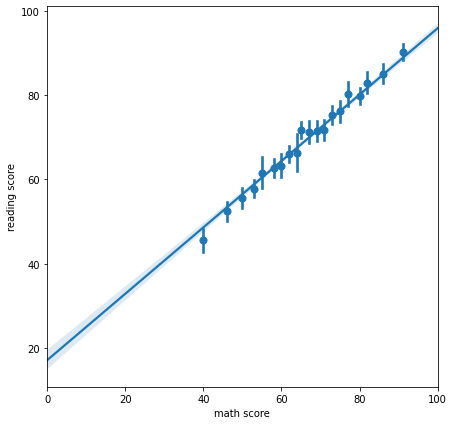

In [46]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.regplot(x='math score', y='reading score', data=student,
            x_estimator=np.mean, x_bins=20
           )
plt.show()

다차원 회귀선은 `order` 파라미터를 통해 전달할 수 있습니다. 다만 현재 데이터에서는 선형성이 강해 따로 2차원으로 회귀선을 그리지 않아도 잘 보이는 것을 알 수 있습니다.

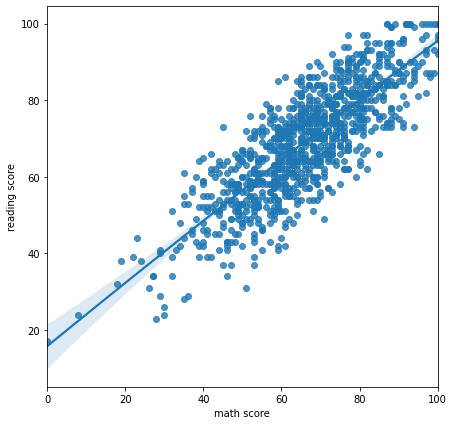

In [47]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.regplot(x='math score', y='reading score', data=student,
            order=2
           )
plt.show()

로그를 사용할 수도 있습니다.

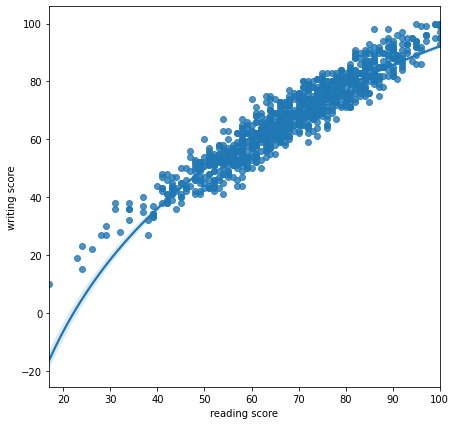

In [48]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.regplot(x='reading score', y='writing score', data=student,
            logx=True
           )
plt.show()

## 5. Matrix Plots

### 5-1. Heatmap

데이터의 행렬이나 배열을 나타냄  

히트맵은 다양한 방식으로 사용될 수 있습니다.

대표적으로는 상관관계(correlation) 시각화에 많이 사용됩니다.

In [49]:
# 성적 상관관계
student.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000



이런 상관관계는 다양한 방법이 있는데, pandas에서는 다음과 같은 방법을 제공함

더 자세한 상관관계는 scatter plot과 reg plot으로 살펴보는 것 추천합니다.

|방법|설명|
|-|-|
|Pearson Linear correlation coefficient|모수적 방법(두 변수의 정규성 가정), 연속형 & 연속형 변수 사이의 선형 관계 검정, (-1,1)사이의 값을 가지며 0으로 갈수록 선형 상관관계가 없다는 해석 가능 |
|Spearman Rank-order correlation coefficient|비모수적 방법(정규성 가정 x), 연속형 & 연속형 변수 사이의 단조 관계 검정, 값에 순위를 매겨 순위에 대한 상관성을 계수로 표현 - 연속형 변수가 아닌 순서형 변수에도 사용 가능 단조성(monotonicity) 평가 - 곡선 관계도 가능|
|kendall Rank-order correlation coefficient|비모수적 방법(정규성 가정 x), 연속형 & 연속형 변수 사이의 단조 관계 검정, 값에 순위를 매겨 순위에 대한 상관성을 계수로 표현함 - 연속형 변수가 아닌 순서형 변수에도 사용 가능 단조성(monotonicity) 평가. 일반적으로 Spearman의 rho 상관 관계보다 값이 작다. 일치/불일치 쌍을 기반으로 계산하며 오류에 덜 민감|



성적은 모두 선형성이 강하므로(공부 잘하는애가 다잘함) 이번에는 다른 데이터로 시각화해보도록 하겠습니다.

[Heart Disease](https://www.kaggle.com/ronitf/heart-disease-uci) 데이터셋을 사용하여 만들어보겠습니다.

In [92]:
# 심장병 데이터
heart = pd.read_csv('./heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


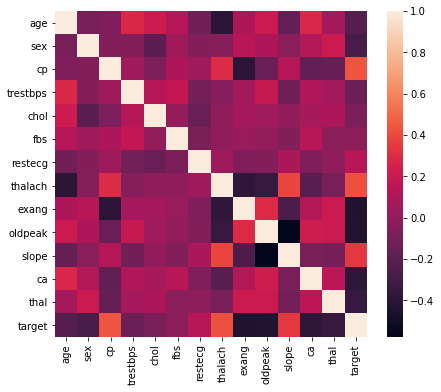

In [52]:
fig, ax = plt.subplots(1,1 ,figsize=(7, 6))
sns.heatmap(heart.corr(), ax=ax)
plt.show()

상관계수는 -1~1까지이므로 색의 범위를 맞추기 위해 `vmin`과 `vmax`로 범위를 조정합니다.

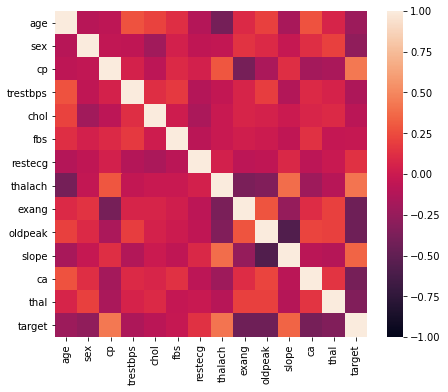

In [53]:
fig, ax = plt.subplots(1,1 ,figsize=(7, 6))
sns.heatmap(heart.corr(), ax=ax,        
           vmin=-1, vmax=1 # -1 ~ 1
           )
plt.show()

0을 기준으로 음/양이 중요하므로 `center`를 지정해줄 수도 있습니다.

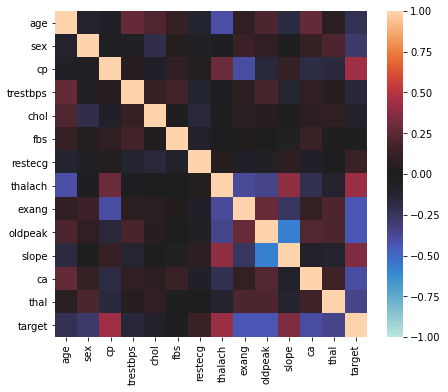

In [54]:
fig, ax = plt.subplots(1,1 ,figsize=(7, 6))
sns.heatmap(heart.corr(), ax=ax,
           vmin=-1, vmax=1, center=0
           )
plt.show()

`cmap`을 바꿔 가독성을 높여보겠습니다. 여기서는 음/양이 정반대의 의미를 가지니 diverse colormap인 coolwarm을 사용해보았습니다.

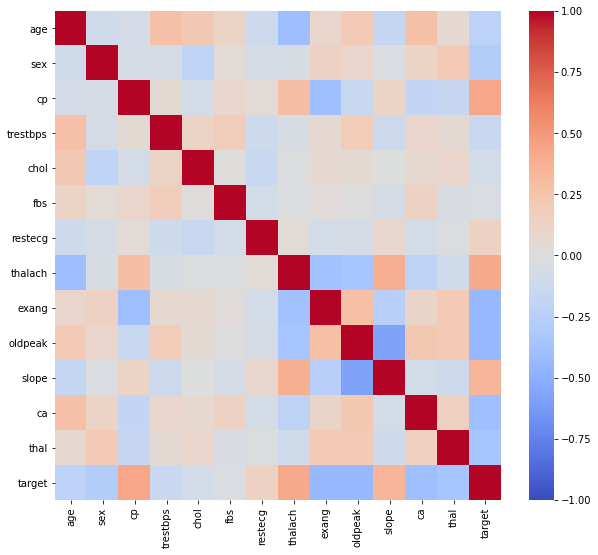

In [55]:
fig, ax = plt.subplots(1,1 ,figsize=(10, 9))
sns.heatmap(heart.corr(), ax=ax,
           vmin=-1, vmax=1, center=0,
            cmap='coolwarm'
           )
plt.show()

`annot`와 `fmt`를 사용하면 실제 값에 들어갈 내용을 작성할 수 있습니다.

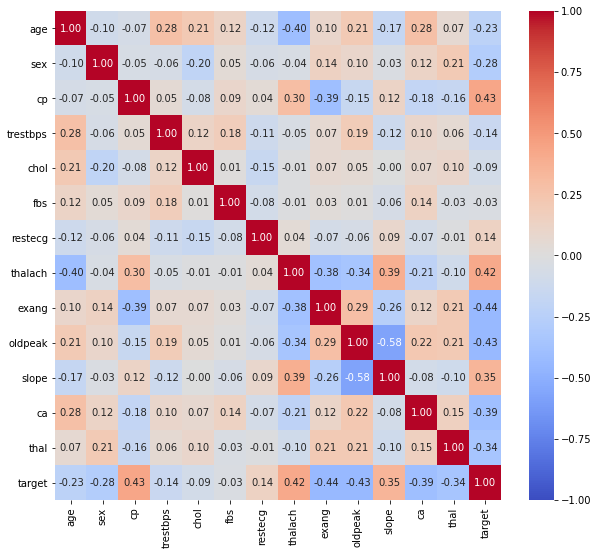

In [56]:
fig, ax = plt.subplots(1,1 ,figsize=(10, 9))
sns.heatmap(heart.corr(), ax=ax,
           vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            annot=True, # 실제값 적어줌
            fmt='.2f' # d
           )
plt.show()

`linewidth`를 사용하여 칸 사이를 나눌 수도 있습니다.

그리고 `square`를 사용하여 정사각형을 사용할 수도 있습니다. 

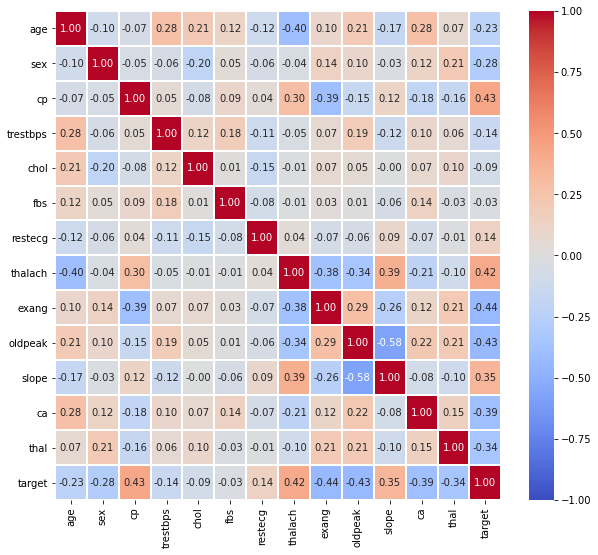

In [96]:
fig, ax = plt.subplots(1,1 ,figsize=(10, 9))
sns.heatmap(heart.corr(), ax=ax,
           vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            annot=True, fmt='.2f',
            linewidth=1,
           )
plt.show()

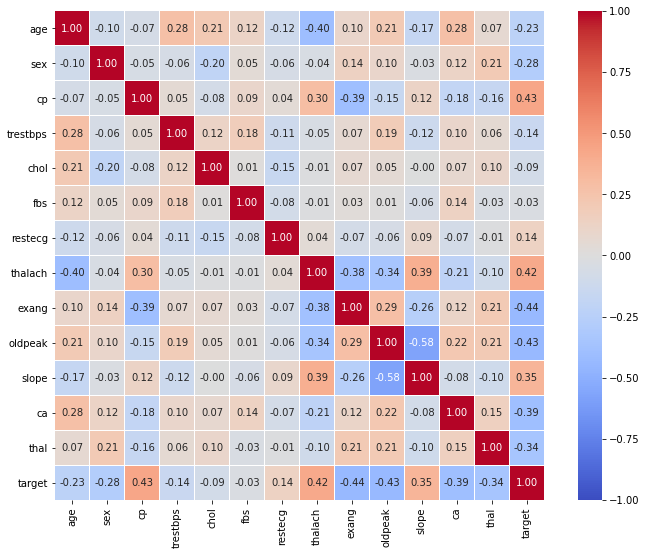

In [58]:
fig, ax = plt.subplots(1,1 ,figsize=(12, 9))
sns.heatmap(heart.corr(), ax=ax,
           vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            annot=True, fmt='.2f',
            linewidth=0.1, square=True
           )
plt.show()

대칭인 경우나 특정 모양에 따라 필요없는 부분을 지울 수도 있습니다.

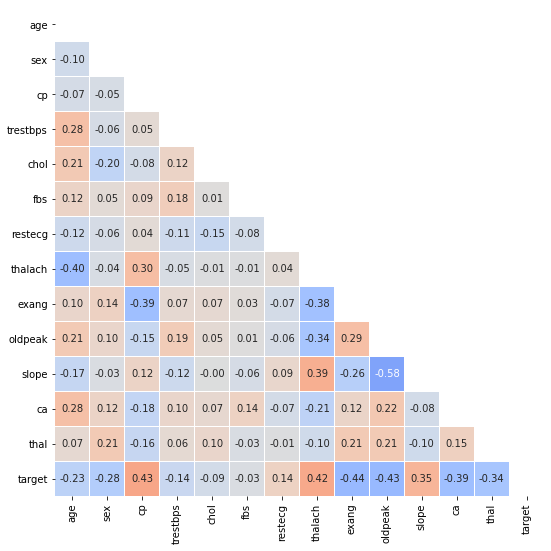

In [59]:
fig, ax = plt.subplots(1,1 ,figsize=(10, 9))

# mask 생성
mask = np.zeros_like(heart.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(heart.corr(), ax=ax,
           vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            annot=True, fmt='.2f',
            linewidth=0.1, square=True, cbar=False,
            mask=mask # mask를 씌워서 지운다
           )
plt.show()